# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_1samp

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [18]:
data.shape

(4870, 65)

C:\Users\Amin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


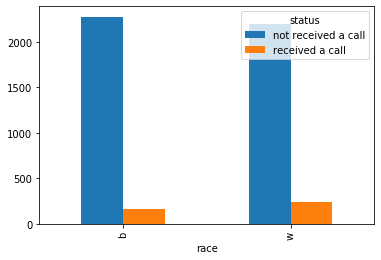

In [72]:
race_df = data[['race','call']]
race_df['status'] = np.where(race_df['call']== 0.0, 'not received a call', 'received a call')
race_df = race_df.pivot_table(index='race',columns='status',values='call',aggfunc='count')
race_df.plot.bar() 

In [73]:
race_df

status,not received a call,received a call
race,,
b,2278,157
w,2200,235


#  What test is appropriate for this problem? Does CLT apply?

**Chi-square statistic is a good choice for hypothesis testing for this problem.**

 The CLT applies:
   - The sample size must not be bigger than 10% of the entire population.
   - (np>10 and n(1-p)>10) 
   - one person's call back does not affect others'.
   

       Ho : The race and the call back ratio is independent.
       Ha : the race and the call back ratio is not independent.

In [84]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [   [2278, 157],
            [2200,  235]]
#Expected probabilty =  (157+235)/(2435+2435) = 0.0805 , expected value  = 0.805* 4870 = 196
# chi-value = sqrt((157-196)**2 / 196  +  (235-196)**2 / 196) = sqrt(16.44)
stat, p, dof, expected = chi2_contingency(table)
stat, p, dof, expected

(16.44902858418937, 4.997578389963255e-05, 1, array([[2239.,  196.],
        [2239.,  196.]]))

In [85]:
if p <= 0.05:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


**p value is smaller than 0.5%, which means that the Null hypothesis is rejected, in other words, the race and the call back ratio is not independent, the racial discrimination does exist.**

In [89]:
w = data[data.race=='w'].call
b = data[data.race=='b'].call

# Bootstrapping

 **H0 : The call back ratio of white-sounding name is equal to the call back ratio of black-sounding name.
   Ha : The call back ratio of white-sounding name is not equal to the call back ratio of black-sounding name.**

In [207]:
w_bs_replicates = np.empty(10000)
for i in range(10000):
    w_bs_replicates[i] = sum(np.random.choice(w, size=len(w)))
    
b_bs_replicates = np.empty(10000)
for i in range(10000):
    b_bs_replicates[i] = sum(np.random.choice(b, size=len(b)))
    
p_value = np.sum( w_bs_replicates < b_bs_replicates) / len(b_bs_replicates)
p_value

0.0

**Null hypothesis has been rejected.**

# Confidence interval , Margin of error

**Frequentist Aproach**

**Calculating margin of error and confidence intervals for White-Sounding name**

In [222]:
p_call = (157+235)/(2435+2435)
p_w    =  ((235)/(157+235))
p_b    =   ((157)/(157+235))
(p_w,p_b,p_call)

(0.5994897959183674, 0.4005102040816326, 0.08049281314168377)

In [219]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
z_margin_of_error = z_critical * np.sqrt(p_w*(1-p_w)/len(w))
z_confidence_interval = (p_w - z_margin_of_error,
                           p_w + z_margin_of_error)
z_confidence_interval,z_margin_of_error

((0.5800274002009193, 0.6189521916358155), 0.019462395717448084)

**Margin of error:  0.019462395717448084**

**Confidence interval:  0.5800274002009193 , 0.6189521916358155**

**Calculating margin of error and confidence intervals for Black-Sounding name**

In [223]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
z_margin_of_error = z_critical * np.sqrt(p_b*(1-p_b)/len(b))
z_confidence_interval = (p_b - z_margin_of_error,
                           p_b + z_margin_of_error)
z_confidence_interval,z_margin_of_error

((0.38104780836418456, 0.4199725997990807), 0.019462395717448084)

**Margin of error:  0.019462395717448084**

**Confidence interval:  0.38104780836418456 , 0.4199725997990807**

In [229]:
ztest ,pval = stests.ztest(w, x2=b, value=0,alternative='two-sided')
ztest ,pval

(4.114705356750735, 3.8767429116085706e-05)

**p-value = 3.8767429116085706e-05 is very small even while assuming the null hypothesis is true. This means a difference in the proportion of callbacks between white and balck sounding names, is significant.**

<div class="span5 alert alert-success">
    <p> Conclusion</p>
  With 95% confidence, those who get callbacks

- White-sounding names get called back 58 - 62% of the time; or 60.0 ± 2% of the time.
- Black-sounding names get called back 38 - 42% of the time; or 40.0 ± 2% of the time. </p>
</div>

# Does this analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how could this analysis be amended?

**No, this analysis only was based on correlation between race and callbacks. There are other variables in the data that could have impact on the callback rate.**

**For improving this analysis, we have to involve the additional data from the table and analyze for significance and coorelation between them**